In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [107]:
train= pd.read_csv("Train.csv")
test= pd.read_csv("Test.csv")
submission=pd.read_csv("sample_submission.csv")

In [108]:
train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


# Decriptive Analytics

In [109]:
train.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [110]:
test.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7'],
      dtype='object')

In [111]:
train.shape

(7000, 24)

In [112]:
test.shape

(3000, 23)

In [113]:
train["data"] = "train"
test["data"] = "test"

In [114]:
test.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,data
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,...,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4,test
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,...,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2,test
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,...,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3,test
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,...,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3,test
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,...,type2,4.0,4,1.6081,0.7075,2.0,2,7,4,test


In [115]:
train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,data
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841,train
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670,train
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851,train
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668,train
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827,train


In [116]:
train.shape, test.shape

((7000, 25), (3000, 24))

In [117]:
data = pd.concat([train,test])

In [118]:
data = data.reset_index().drop(columns="index")

In [119]:
data.head(5)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,data
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841,train
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670,train
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851,train
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668,train
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827,train


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                10000 non-null  object 
 1   Gender                     10000 non-null  object 
 2   Age                        9427 non-null   float64
 3   Education_Level            10000 non-null  int64  
 4   Relationship_Status        10000 non-null  object 
 5   Hometown                   10000 non-null  object 
 6   Unit                       10000 non-null  object 
 7   Decision_skill_possess     10000 non-null  object 
 8   Time_of_service            9804 non-null   float64
 9   Time_since_promotion       10000 non-null  int64  
 10  growth_rate                10000 non-null  int64  
 11  Travel_Rate                10000 non-null  int64  
 12  Post_Level                 10000 non-null  int64  
 13  Pay_Scale                  9988 non-null   floa

In [121]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,9427.0,39.675507,13.574856,19.0000,27.0000,38.00000,52.0000,65.0000
Education_Level,10000.0,3.199400,1.065436,1.0000,3.0000,3.00000,4.0000,5.0000
Time_of_service,9804.0,13.390657,10.311381,0.0000,5.0000,10.00000,21.0000,43.0000
Time_since_promotion,10000.0,2.378600,1.149780,0.0000,1.0000,2.00000,3.0000,4.0000
growth_rate,10000.0,47.008400,15.848553,20.0000,33.0000,47.00000,61.0000,74.0000
Travel_Rate,10000.0,0.820700,0.646524,0.0000,0.0000,1.00000,1.0000,2.0000
Post_Level,10000.0,2.797000,1.171037,1.0000,2.0000,3.00000,4.0000,5.0000
Pay_Scale,9988.0,6.022627,2.070087,1.0000,5.0000,6.00000,8.0000,10.0000
Work_Life_balance,9984.0,2.385817,1.128782,1.0000,1.0000,2.00000,3.0000,5.0000
VAR1,10000.0,3.089100,0.831884,1.0000,3.0000,3.00000,3.0000,5.0000


In [122]:
data.isna().sum()

Employee_ID                     0
Gender                          0
Age                           573
Education_Level                 0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Time_of_service               196
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                      12
Compensation_and_Benefits       0
Work_Life_balance              16
VAR1                            0
VAR2                          794
VAR3                            0
VAR4                          954
VAR5                            0
VAR6                            0
VAR7                            0
Attrition_rate               3000
data                            0
dtype: int64

In [123]:
data.select_dtypes(include=np.number).drop(columns=['Attrition_rate'])

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,42.0,4,4.0,4,33,1,1,7.0,3.0,4,0.7516,1.8688,2.0,4,5,3
1,24.0,3,5.0,4,36,0,3,6.0,4.0,3,-0.9612,-0.4537,2.0,3,5,3
2,58.0,3,27.0,3,51,0,2,8.0,1.0,4,-0.9612,-0.4537,3.0,3,8,3
3,26.0,3,4.0,3,56,1,3,8.0,1.0,3,-1.8176,-0.4537,NaN,3,7,3
4,31.0,1,5.0,4,62,1,3,2.0,3.0,1,0.7516,-0.4537,2.0,2,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32.0,3,3.0,3,38,1,3,6.0,2.0,1,-0.1048,0.7075,1.0,4,7,4
9996,NaN,2,10.0,2,57,1,4,9.0,1.0,3,0.7516,0.7075,3.0,4,8,3
9997,60.0,4,35.0,1,69,0,2,9.0,3.0,3,-1.8176,-0.4537,NaN,4,8,4
9998,51.0,1,23.0,1,30,0,2,6.0,1.0,5,0.7516,-0.4537,2.0,3,9,2


In [124]:
numerical_columns=data.select_dtypes(include=np.number).drop(columns=['Attrition_rate']).columns

In [125]:
numerical_columns

Index(['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion',
       'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7'],
      dtype='object')

In [126]:
data.select_dtypes(exclude=np.number)

,Employee_ID,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits,data
0,EID_23371,F,Married,Franklin,IT,Conceptual,type2,train
1,EID_18000,M,Single,Springfield,Logistics,Analytical,type2,train
2,EID_3891,F,Married,Clinton,Quality,Conceptual,type2,train
3,EID_17492,F,Single,Lebanon,Human Resource Management,Behavioral,type2,train
4,EID_22534,F,Married,Springfield,Logistics,Conceptual,type3,train
...,...,...,...,...,...,...,...,...
9995,EID_22547,F,Single,Franklin,Sales,Directive,type2,test
9996,EID_10066,F,Single,Franklin,Marketing,Conceptual,type2,test
9997,EID_7126,F,Single,Lebanon,Logistics,Analytical,type3,test
9998,EID_4929,F,Married,Springfield,IT,Behavioral,type3,test


In [127]:
category_columns=data.select_dtypes(exclude=np.number).columns

In [128]:
category_columns

Index(['Employee_ID', 'Gender', 'Relationship_Status', 'Hometown', 'Unit',
       'Decision_skill_possess', 'Compensation_and_Benefits', 'data'],
      dtype='object')

In [129]:
data[category_columns].apply(lambda x: x.nunique())

Employee_ID                  10000
Gender                           2
Relationship_Status              2
Hometown                         5
Unit                            12
Decision_skill_possess           4
Compensation_and_Benefits        5
data                             2
dtype: int64

In [130]:
data[category_columns].apply(lambda x: print(x.value_counts()))

EID_6932     1
EID_19975    1
EID_12894    1
EID_16941    1
EID_15653    1
            ..
EID_12181    1
EID_14618    1
EID_18747    1
EID_10077    1
EID_10189    1
Name: Employee_ID, Length: 10000, dtype: int64
F    5842
M    4158
Name: Gender, dtype: int64
Married    6461
Single     3539
Name: Relationship_Status, dtype: int64
Lebanon        2953
Springfield    2484
Franklin       2181
Washington     1570
Clinton         812
Name: Hometown, dtype: int64
IT                           1963
Logistics                    1648
Sales                        1389
Operarions                   1008
R&D                           991
Purchasing                    714
Accounting and Finance        679
Human Resource Management     513
Marketing                     319
Production                    292
Quality                       290
Security                      194
Name: Unit, dtype: int64
Behavioral    2535
Analytical    2501
Directive     2488
Conceptual    2476
Name: Decision_skill_possess, d

Employee_ID                  None
Gender                       None
Relationship_Status          None
Hometown                     None
Unit                         None
Decision_skill_possess       None
Compensation_and_Benefits    None
data                         None
dtype: object

# Observation:
1.Employee_ID                - AlphaNumeric Value.Unique Values              
2.Gender                     - Male-0 or Female-1                   
3.Relationship_Status        -Categorical Married or Single        
4.Hometown                   -There are 5 different cities            
5.Unit                       -Department under which the employee work    .12 different units are there         
6.Decision_skill_possess     -Decision skill that an employee possesses. 4 different vlaues are present
7.Compensation_and_Benefits  - % different types of Compensations and Benefits  

# EDA

In [131]:
data[numerical_columns].isna().sum()

Age                     573
Education_Level           0
Time_of_service         196
Time_since_promotion      0
growth_rate               0
Travel_Rate               0
Post_Level                0
Pay_Scale                12
Work_Life_balance        16
VAR1                      0
VAR2                    794
VAR3                      0
VAR4                    954
VAR5                      0
VAR6                      0
VAR7                      0
dtype: int64

In [132]:
data[category_columns].isna().sum()

Employee_ID                  0
Gender                       0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Compensation_and_Benefits    0
data                         0
dtype: int64

In [133]:
data.isna().sum()/data.shape[0]

Employee_ID                  0.0000
Gender                       0.0000
Age                          0.0573
Education_Level              0.0000
Relationship_Status          0.0000
Hometown                     0.0000
Unit                         0.0000
Decision_skill_possess       0.0000
Time_of_service              0.0196
Time_since_promotion         0.0000
growth_rate                  0.0000
Travel_Rate                  0.0000
Post_Level                   0.0000
Pay_Scale                    0.0012
Compensation_and_Benefits    0.0000
Work_Life_balance            0.0016
VAR1                         0.0000
VAR2                         0.0794
VAR3                         0.0000
VAR4                         0.0954
VAR5                         0.0000
VAR6                         0.0000
VAR7                         0.0000
Attrition_rate               0.3000
data                         0.0000
dtype: float64

In [134]:
data['Gender'].value_counts()

F    5842
M    4158
Name: Gender, dtype: int64

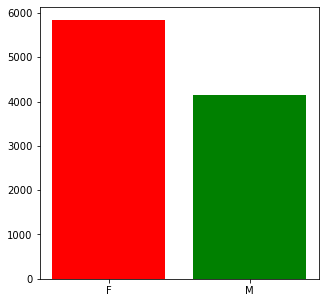

In [135]:
plt.figure(figsize=(5,5))
plt.bar(list(data["Gender"].value_counts().keys()),list(data["Gender"].value_counts()),color=['r','g'])
plt.show()

<AxesSubplot:ylabel='Education_Level'>

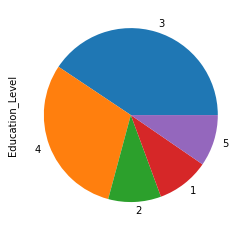

In [136]:
data["Education_Level"].value_counts().plot(kind = "pie")

<AxesSubplot:>

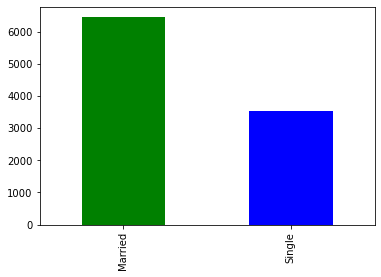

In [137]:
data["Relationship_Status"].value_counts().plot(kind = "bar",color=['g','b','y'])

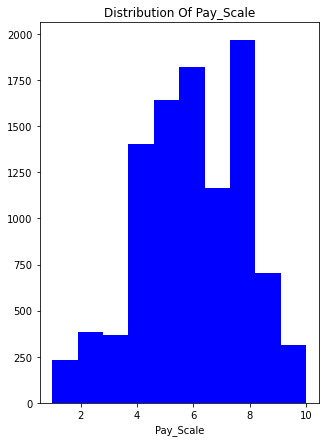

In [138]:
plt.figure(figsize=(5,7))
plt.hist(data["Pay_Scale"],color='b')
plt.title("Distribution Of Pay_Scale")
plt.xlabel("Pay_Scale")
plt.show()

In [139]:
pd.crosstab(data["Relationship_Status"],data['Gender'])

Gender,F,M
Relationship_Status,,
Married,3769,2692
Single,2073,1466


In [140]:
data.corr().T

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Age,1.000000,-0.019583,0.917295,0.160433,-0.000487,0.010592,-0.012755,0.008032,0.000100,0.000669,0.006181,0.005103,-0.001340,-0.002263,-0.002986,0.003758,-0.015498
Education_Level,-0.019583,1.000000,-0.023769,-0.004403,0.004248,-0.018508,0.003910,0.001540,-0.007092,-0.000978,-0.011788,-0.012551,-0.006163,0.002439,0.002964,0.010247,-0.008143
Time_of_service,0.917295,-0.023769,1.000000,0.146848,-0.004935,0.009064,-0.014277,0.011298,-0.002006,-0.000426,0.006772,0.003769,-0.004993,0.004655,-0.001055,-0.000987,-0.016447
Time_since_promotion,0.160433,-0.004403,0.146848,1.000000,0.000572,-0.014822,-0.008798,-0.002681,-0.002505,-0.005158,0.006634,0.001299,-0.009633,-0.002644,0.001764,0.000285,0.013880
growth_rate,-0.000487,0.004248,-0.004935,0.000572,1.000000,0.008024,-0.008832,0.001850,-0.014718,-0.013294,0.000886,0.007201,0.029691,-0.006268,-0.008025,-0.013571,0.014247
Travel_Rate,0.010592,-0.018508,0.009064,-0.014822,0.008024,1.000000,0.011363,-0.006102,-0.001753,0.010926,0.002904,-0.008601,0.001686,-0.004150,-0.009697,0.006319,-0.012608
Post_Level,-0.012755,0.003910,-0.014277,-0.008798,-0.008832,0.011363,1.000000,0.024410,-0.002089,-0.006378,-0.007658,0.008104,-0.005878,0.002695,-0.000051,-0.005792,0.016402
Pay_Scale,0.008032,0.001540,0.011298,-0.002681,0.001850,-0.006102,0.024410,1.000000,-0.029594,0.012256,0.008507,-0.002106,-0.001622,0.007738,-0.011612,-0.002655,-0.015236
Work_Life_balance,0.000100,-0.007092,-0.002006,-0.002505,-0.014718,-0.001753,-0.002089,-0.029594,1.000000,-0.014009,-0.002449,0.000670,-0.011015,0.025167,0.001128,0.025743,0.020746
VAR1,0.000669,-0.000978,-0.000426,-0.005158,-0.013294,0.010926,-0.006378,0.012256,-0.014009,1.000000,-0.000057,0.002303,0.011319,-0.001639,-0.010254,0.007538,-0.008073


<AxesSubplot:>

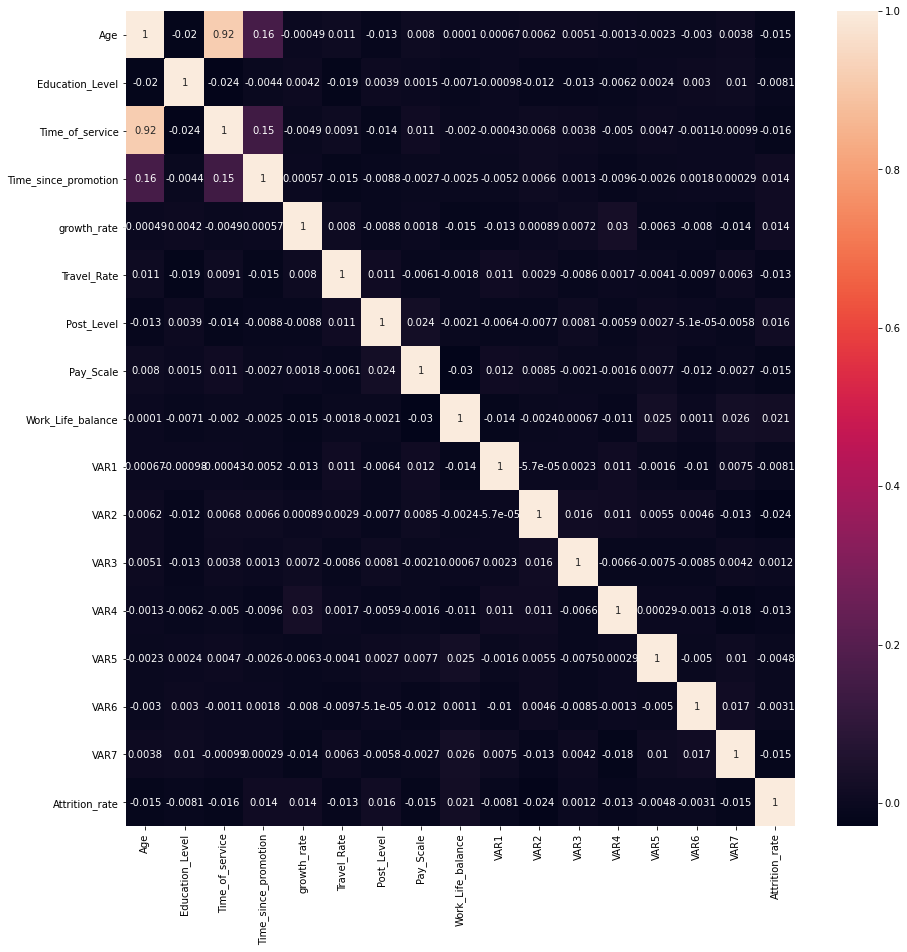

In [141]:
plt.figure(figsize=(15,15))
sbn.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='Pay_Scale'>

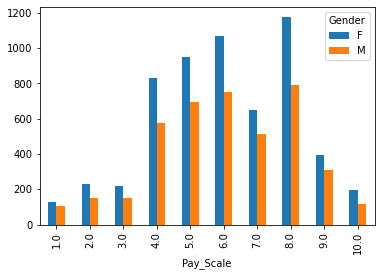

In [142]:
pd.crosstab(data["Pay_Scale"],data['Gender']).plot(kind = "bar") 

<AxesSubplot:xlabel='Gender'>

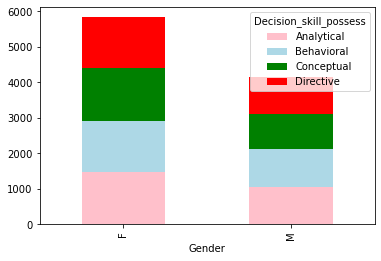

In [143]:
pd.crosstab(data["Gender"],data['Decision_skill_possess']).plot(kind = 'bar',color=['pink','lightblue','green','red'] ,stacked=True) 

<AxesSubplot:xlabel='Age'>

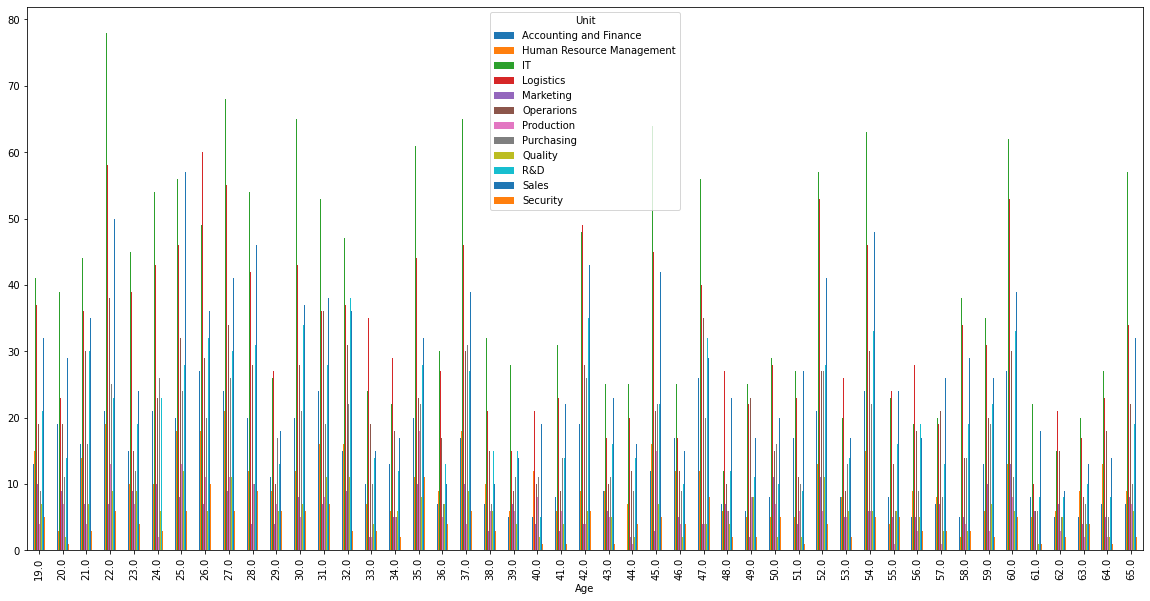

In [144]:
pd.crosstab(data["Age"],data['Unit']).tail(50).plot(kind = 'bar',  figsize=(20, 10))

<AxesSubplot:xlabel='Gender'>

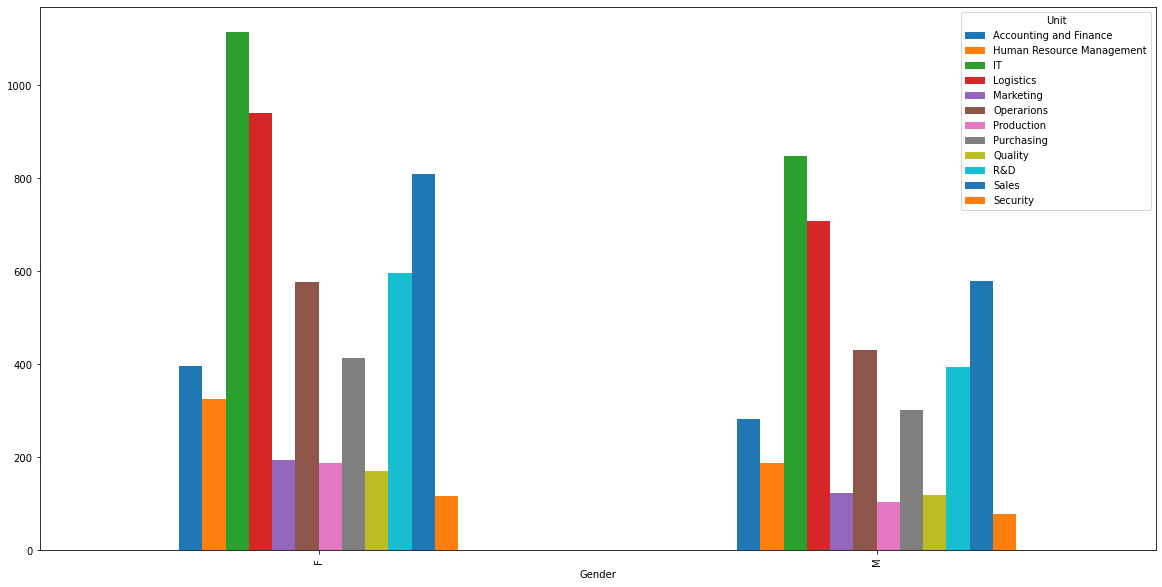

In [145]:
pd.crosstab(data["Gender"],data['Unit']).tail(50).plot(kind = 'bar',  figsize=(20, 10))

In [146]:
data.pivot_table(values="Pay_Scale", index = "Age", columns = "Unit").head(50)

Unit,Accounting and Finance,Human Resource Management,IT,Logistics,Marketing,Operarions,Production,Purchasing,Quality,R&D,Sales,Security
Age,,,,,,,,,,,,
19.0,5.615385,7.000000,6.195122,6.216216,5.900000,6.473684,5.250000,6.666667,7.142857,5.761905,5.593750,5.000000
20.0,6.736842,4.666667,5.641026,6.000000,6.333333,6.210526,6.285714,6.909091,6.500000,4.785714,6.620690,1.000000
21.0,5.937500,7.214286,5.431818,6.138889,5.000000,5.466667,4.750000,6.437500,5.714286,5.933333,5.323529,7.000000
22.0,5.523810,5.894737,6.076923,6.086207,5.285714,5.973684,6.076923,6.800000,6.555556,6.304348,5.920000,6.166667
23.0,5.666667,6.000000,6.155556,5.794872,6.888889,6.714286,5.428571,5.583333,6.111111,5.842105,5.913043,5.500000
24.0,6.571429,6.700000,6.333333,6.325581,6.100000,5.695652,7.000000,5.440000,7.000000,5.956522,6.069767,7.666667
25.0,6.650000,6.000000,5.500000,6.347826,6.500000,6.062500,6.153846,6.083333,6.750000,6.642857,6.157895,5.166667
26.0,5.740741,4.888889,5.775510,6.066667,6.428571,5.758621,4.818182,6.950000,5.666667,5.531250,6.777778,6.400000
27.0,6.166667,6.238095,5.779412,5.981818,5.555556,5.823529,5.636364,5.692308,4.727273,5.900000,5.829268,5.333333


In [147]:
data.pivot_table(values="Pay_Scale", index = "Age", columns = "Decision_skill_possess").head(10)

Decision_skill_possess,Analytical,Behavioral,Conceptual,Directive
Age,,,,
19.0,6.031746,5.763636,6.406780,6.250000
20.0,6.186047,5.813953,6.145833,6.119048
21.0,5.609375,5.892857,5.888889,5.810345
22.0,5.752809,6.258065,5.773333,6.422222
23.0,6.183673,6.000000,5.913043,5.870968
24.0,6.013158,6.590909,6.049180,6.050000
25.0,6.406593,5.525000,6.213333,6.364865
26.0,5.831169,5.967742,6.087912,5.866667
27.0,5.602410,5.730769,6.188889,5.764706


In [148]:
data["Gender"].replace({"F":1, "M":0}, inplace=True)

In [149]:
data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,data
0,EID_23371,1,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841,train
1,EID_18000,0,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670,train
2,EID_3891,1,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851,train
3,EID_17492,1,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668,train
4,EID_22534,1,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827,train


In [150]:
data[numerical_columns].isna().sum()

Age                     573
Education_Level           0
Time_of_service         196
Time_since_promotion      0
growth_rate               0
Travel_Rate               0
Post_Level                0
Pay_Scale                12
Work_Life_balance        16
VAR1                      0
VAR2                    794
VAR3                      0
VAR4                    954
VAR5                      0
VAR6                      0
VAR7                      0
dtype: int64

In [151]:
np.mean(data["Age"])

39.675506523814576

In [152]:
np.median(data["Age"])

nan

In [153]:
data["Age"] = data["Age"].fillna(np.mean(data["Age"]))

In [154]:
data[numerical_columns].isna().sum()

Age                       0
Education_Level           0
Time_of_service         196
Time_since_promotion      0
growth_rate               0
Travel_Rate               0
Post_Level                0
Pay_Scale                12
Work_Life_balance        16
VAR1                      0
VAR2                    794
VAR3                      0
VAR4                    954
VAR5                      0
VAR6                      0
VAR7                      0
dtype: int64

In [155]:
data["Time_of_service"] = data["Time_of_service"].fillna(np.mean(data["Time_of_service"]))

In [156]:
data[numerical_columns].isna().sum()

Age                       0
Education_Level           0
Time_of_service           0
Time_since_promotion      0
growth_rate               0
Travel_Rate               0
Post_Level                0
Pay_Scale                12
Work_Life_balance        16
VAR1                      0
VAR2                    794
VAR3                      0
VAR4                    954
VAR5                      0
VAR6                      0
VAR7                      0
dtype: int64

In [157]:
data["Pay_Scale"] = data["Pay_Scale"].fillna(np.mean(data["Pay_Scale"]))

In [158]:
data[numerical_columns].isna().sum()

Age                       0
Education_Level           0
Time_of_service           0
Time_since_promotion      0
growth_rate               0
Travel_Rate               0
Post_Level                0
Pay_Scale                 0
Work_Life_balance        16
VAR1                      0
VAR2                    794
VAR3                      0
VAR4                    954
VAR5                      0
VAR6                      0
VAR7                      0
dtype: int64

In [159]:
data["Work_Life_balance"].value_counts()

1.0    2951
3.0    2858
2.0    2287
4.0    1719
5.0     169
Name: Work_Life_balance, dtype: int64

In [160]:
train["Work_Life_balance"].value_counts()

1.0    2042
3.0    2023
2.0    1615
4.0    1197
5.0     112
Name: Work_Life_balance, dtype: int64

In [163]:
data["Work_Life_balance"] = data["Work_Life_balance"].fillna(np.mean(data["Work_Life_balance"]))

In [164]:
data[numerical_columns].isna().sum()

Age                       0
Education_Level           0
Time_of_service           0
Time_since_promotion      0
growth_rate               0
Travel_Rate               0
Post_Level                0
Pay_Scale                 0
Work_Life_balance         0
VAR1                      0
VAR2                    794
VAR3                      0
VAR4                    954
VAR5                      0
VAR6                      0
VAR7                      0
dtype: int64

In [166]:
data=data.drop(['VAR2', 'VAR4'], axis=1)

In [167]:
data.isna().sum()

Employee_ID                     0
Gender                          0
Age                             0
Education_Level                 0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Time_of_service                 0
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                       0
Compensation_and_Benefits       0
Work_Life_balance               0
VAR1                            0
VAR3                            0
VAR5                            0
VAR6                            0
VAR7                            0
Attrition_rate               3000
data                            0
dtype: int64

In [169]:
data.isna().sum()

Employee_ID                     0
Gender                          0
Age                             0
Education_Level                 0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Time_of_service                 0
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                       0
Compensation_and_Benefits       0
Work_Life_balance               0
VAR1                            0
VAR3                            0
VAR5                            0
VAR6                            0
VAR7                            0
Attrition_rate               3000
data                            0
dtype: int64

In [170]:
numerical_columns

Index(['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion',
       'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7'],
      dtype='object')

In [172]:
numerical_columns.drop(['VAR2', 'VAR4'])

Index(['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion',
       'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale',
       'Work_Life_balance', 'VAR1', 'VAR3', 'VAR5', 'VAR6', 'VAR7'],
      dtype='object')

In [174]:
data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR3,VAR5,VAR6,VAR7,Attrition_rate,data
0,EID_23371,1,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,7.0,type2,3.0,4,1.8688,4,5,3,0.1841,train
1,EID_18000,0,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,6.0,type2,4.0,3,-0.4537,3,5,3,0.0670,train
2,EID_3891,1,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,8.0,type2,1.0,4,-0.4537,3,8,3,0.0851,train
3,EID_17492,1,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,8.0,type2,1.0,3,-0.4537,3,7,3,0.0668,train
4,EID_22534,1,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,2.0,type3,3.0,1,-0.4537,2,8,2,0.1827,train


In [175]:
category_columns

Index(['Employee_ID', 'Gender', 'Relationship_Status', 'Hometown', 'Unit',
       'Decision_skill_possess', 'Compensation_and_Benefits', 'data'],
      dtype='object')

In [178]:
data.select_dtypes(include=np.number)

,Gender,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR3,VAR5,VAR6,VAR7,Attrition_rate
0,1,42.000000,4,4.0,4,33,1,1,7.0,3.0,4,1.8688,4,5,3,0.1841
1,0,24.000000,3,5.0,4,36,0,3,6.0,4.0,3,-0.4537,3,5,3,0.0670
2,1,58.000000,3,27.0,3,51,0,2,8.0,1.0,4,-0.4537,3,8,3,0.0851
3,1,26.000000,3,4.0,3,56,1,3,8.0,1.0,3,-0.4537,3,7,3,0.0668
4,1,31.000000,1,5.0,4,62,1,3,2.0,3.0,1,-0.4537,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,32.000000,3,3.0,3,38,1,3,6.0,2.0,1,0.7075,4,7,4,NaN
9996,1,39.675507,2,10.0,2,57,1,4,9.0,1.0,3,0.7075,4,8,3,NaN
9997,1,60.000000,4,35.0,1,69,0,2,9.0,3.0,3,-0.4537,4,8,4,NaN
9998,1,51.000000,1,23.0,1,30,0,2,6.0,1.0,5,-0.4537,3,9,2,NaN


In [177]:
(data.select_dtypes(include=np.number)).isna().sum()

Gender                     0
Age                        0
Education_Level            0
Time_of_service            0
Time_since_promotion       0
growth_rate                0
Travel_Rate                0
Post_Level                 0
Pay_Scale                  0
Work_Life_balance          0
VAR1                       0
VAR3                       0
VAR5                       0
VAR6                       0
VAR7                       0
Attrition_rate          3000
dtype: int64

In [179]:
processed_numerical_col = data.select_dtypes(include=np.number)

In [185]:
processed_numerical_col

,Gender,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR3,VAR5,VAR6,VAR7,Attrition_rate
0,1,42.000000,4,4.0,4,33,1,1,7.0,3.0,4,1.8688,4,5,3,0.1841
1,0,24.000000,3,5.0,4,36,0,3,6.0,4.0,3,-0.4537,3,5,3,0.0670
2,1,58.000000,3,27.0,3,51,0,2,8.0,1.0,4,-0.4537,3,8,3,0.0851
3,1,26.000000,3,4.0,3,56,1,3,8.0,1.0,3,-0.4537,3,7,3,0.0668
4,1,31.000000,1,5.0,4,62,1,3,2.0,3.0,1,-0.4537,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,32.000000,3,3.0,3,38,1,3,6.0,2.0,1,0.7075,4,7,4,NaN
9996,1,39.675507,2,10.0,2,57,1,4,9.0,1.0,3,0.7075,4,8,3,NaN
9997,1,60.000000,4,35.0,1,69,0,2,9.0,3.0,3,-0.4537,4,8,4,NaN
9998,1,51.000000,1,23.0,1,30,0,2,6.0,1.0,5,-0.4537,3,9,2,NaN


In [208]:
category_columns=data.select_dtypes(exclude=np.number).drop(columns=['data','Employee_ID'])

In [209]:
category_columns

,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
0,Married,Franklin,IT,Conceptual,type2
1,Single,Springfield,Logistics,Analytical,type2
2,Married,Clinton,Quality,Conceptual,type2
3,Single,Lebanon,Human Resource Management,Behavioral,type2
4,Married,Springfield,Logistics,Conceptual,type3
...,...,...,...,...,...
9995,Single,Franklin,Sales,Directive,type2
9996,Single,Franklin,Marketing,Conceptual,type2
9997,Single,Lebanon,Logistics,Analytical,type3
9998,Married,Springfield,IT,Behavioral,type3


In [210]:
pd.get_dummies(category_columns)

,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,...,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
9996,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9997,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
9998,1,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [211]:
processed_category_col=pd.get_dummies(category_columns)

In [212]:
processed_category_col.head()

,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,...,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [213]:
processed_numerical_col

,Gender,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR3,VAR5,VAR6,VAR7,Attrition_rate
0,1,42.000000,4,4.0,4,33,1,1,7.0,3.0,4,1.8688,4,5,3,0.1841
1,0,24.000000,3,5.0,4,36,0,3,6.0,4.0,3,-0.4537,3,5,3,0.0670
2,1,58.000000,3,27.0,3,51,0,2,8.0,1.0,4,-0.4537,3,8,3,0.0851
3,1,26.000000,3,4.0,3,56,1,3,8.0,1.0,3,-0.4537,3,7,3,0.0668
4,1,31.000000,1,5.0,4,62,1,3,2.0,3.0,1,-0.4537,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,32.000000,3,3.0,3,38,1,3,6.0,2.0,1,0.7075,4,7,4,NaN
9996,1,39.675507,2,10.0,2,57,1,4,9.0,1.0,3,0.7075,4,8,3,NaN
9997,1,60.000000,4,35.0,1,69,0,2,9.0,3.0,3,-0.4537,4,8,4,NaN
9998,1,51.000000,1,23.0,1,30,0,2,6.0,1.0,5,-0.4537,3,9,2,NaN


In [214]:
scale = StandardScaler()

In [215]:
pd.DataFrame(scale.fit_transform(processed_numerical_col.drop(columns="Attrition_rate")),columns=processed_numerical_col.drop(columns="Attrition_rate").columns)

,Gender,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR3,VAR5,VAR6,VAR7
0,0.843648,0.176372,0.751467,-0.919813,1.410253,-0.883936,0.277343,-1.534614,0.472448,0.544574,1.095040,1.892105,1.240340,-1.817683,-0.271674
1,-1.185328,-1.189385,-0.187163,-0.821863,1.410253,-0.694634,-1.269467,0.173359,-0.010938,1.431238,-0.107112,-0.452050,0.175853,-1.817683,-0.271674
2,0.843648,1.390378,-0.187163,1.333033,0.540478,0.251872,-1.269467,-0.680627,0.955834,-1.228755,1.095040,-0.452050,0.175853,0.766700,-0.271674
3,0.843648,-1.037635,-0.187163,-0.919813,0.540478,0.567374,0.277343,0.173359,0.955834,-1.228755,-0.107112,-0.452050,0.175853,-0.094761,-0.271674
4,0.843648,-0.658258,-2.064423,-0.821863,1.410253,0.945976,0.277343,0.173359,-1.944481,0.544574,-2.511414,-0.452050,-0.888634,0.766700,-1.360110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.843648,-0.582382,-0.187163,-1.017763,0.540478,-0.568434,0.277343,0.173359,-0.010938,-0.342091,-2.511414,0.719977,1.240340,-0.094761,0.816763
9996,0.843648,0.000000,-1.125793,-0.332114,-0.329297,0.630474,0.277343,1.027346,1.439220,-1.228755,-0.107112,0.719977,1.240340,0.766700,-0.271674
9997,0.843648,1.542129,0.751467,2.116631,-1.199072,1.387679,-1.269467,-0.680627,1.439220,0.544574,-0.107112,-0.452050,1.240340,0.766700,0.816763
9998,0.843648,0.859251,-2.064423,0.941234,-1.199072,-1.073237,-1.269467,-0.680627,-0.010938,-1.228755,2.297191,-0.452050,0.175853,1.628161,-1.360110


In [216]:
preprocessed_data = pd.concat([processed_category_col,processed_numerical_col],axis = 1)

In [217]:
preprocessed_data

,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,...,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR3,VAR5,VAR6,VAR7,Attrition_rate
0,1,0,0,1,0,0,0,0,0,1,...,1,1,7.0,3.0,4,1.8688,4,5,3,0.1841
1,0,1,0,0,0,1,0,0,0,0,...,0,3,6.0,4.0,3,-0.4537,3,5,3,0.0670
2,1,0,1,0,0,0,0,0,0,0,...,0,2,8.0,1.0,4,-0.4537,3,8,3,0.0851
3,0,1,0,0,1,0,0,0,1,0,...,1,3,8.0,1.0,3,-0.4537,3,7,3,0.0668
4,1,0,0,0,0,1,0,0,0,0,...,1,3,2.0,3.0,1,-0.4537,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,0,1,0,0,0,0,0,0,...,1,3,6.0,2.0,1,0.7075,4,7,4,NaN
9996,0,1,0,1,0,0,0,0,0,0,...,1,4,9.0,1.0,3,0.7075,4,8,3,NaN
9997,0,1,0,0,1,0,0,0,0,0,...,0,2,9.0,3.0,3,-0.4537,4,8,4,NaN
9998,1,0,0,0,0,1,0,0,0,1,...,0,2,6.0,1.0,5,-0.4537,3,9,2,NaN


In [220]:
train_preprocessed = preprocessed_data[preprocessed_data['Attrition_rate'].notna()]

In [221]:
train_preprocessed

,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,...,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR3,VAR5,VAR6,VAR7,Attrition_rate
0,1,0,0,1,0,0,0,0,0,1,...,1,1,7.0,3.0,4,1.8688,4,5,3,0.1841
1,0,1,0,0,0,1,0,0,0,0,...,0,3,6.0,4.0,3,-0.4537,3,5,3,0.0670
2,1,0,1,0,0,0,0,0,0,0,...,0,2,8.0,1.0,4,-0.4537,3,8,3,0.0851
3,0,1,0,0,1,0,0,0,1,0,...,1,3,8.0,1.0,3,-0.4537,3,7,3,0.0668
4,1,0,0,0,0,1,0,0,0,0,...,1,3,2.0,3.0,1,-0.4537,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,1,0,0,1,0,0,0,0,0,0,...,1,2,6.0,3.0,1,-0.4537,3,7,3,0.7839
6996,1,0,0,0,1,0,0,0,0,0,...,0,2,4.0,3.0,2,-2.7762,4,8,4,0.1055
6997,0,1,0,0,0,1,0,0,0,1,...,1,2,3.0,4.0,2,-0.4537,4,8,3,0.7847
6998,1,0,0,0,0,0,1,0,0,0,...,1,5,8.0,2.0,4,1.8688,3,6,3,0.4162


In [222]:
test_preprocessed = preprocessed_data[preprocessed_data['Attrition_rate'].isna()]

In [223]:
test_preprocessed

,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,...,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR3,VAR5,VAR6,VAR7,Attrition_rate
7000,0,1,0,0,0,1,0,0,0,0,...,1,5,4.0,1.0,3,-0.4537,1,8,4,NaN
7001,0,1,0,0,1,0,0,0,0,1,...,1,1,1.0,1.0,4,0.7075,2,8,2,NaN
7002,1,0,0,0,0,1,0,0,0,0,...,0,1,8.0,1.0,4,0.7075,1,9,3,NaN
7003,0,1,0,0,0,0,1,0,0,0,...,1,1,2.0,4.0,3,0.7075,2,8,3,NaN
7004,1,0,0,1,0,0,0,0,0,0,...,1,3,2.0,4.0,4,0.7075,2,7,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,0,1,0,0,0,0,0,0,...,1,3,6.0,2.0,1,0.7075,4,7,4,NaN
9996,0,1,0,1,0,0,0,0,0,0,...,1,4,9.0,1.0,3,0.7075,4,8,3,NaN
9997,0,1,0,0,1,0,0,0,0,0,...,0,2,9.0,3.0,3,-0.4537,4,8,4,NaN
9998,1,0,0,0,0,1,0,0,0,1,...,0,2,6.0,1.0,5,-0.4537,3,9,2,NaN


In [224]:
train_preprocessed.to_csv("train_preprocessed.csv", index = False)
test_preprocessed.to_csv("test_preprocessed.csv", index = False)